<a href="https://colab.research.google.com/github/Esther1115/Graphene-MNIST/blob/main/junio_graphene_GNN_NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries of Pythorch Geometrics and python mectric

In [ ]:
pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
#!ls /gdrive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!nvidia-smi

Fri Jun  9 05:12:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |    603MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def element_num(ele):
  if ele == 'C':
    atnume = 6.
  elif ele == 'B':
    atnume = 5.
  else:
    atnume = 7.
  return int(atnume)


In [ ]:
import os
import glob
import numpy as np
import torch
from torch_geometric.data.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import NormalizeScale
from sklearn.model_selection import train_test_split


def load_data(data_file):
  data_list = torch.load(data_file)
  return data_list



def make_loaders(data_list,data_size=0.1,test_size=0.2,bsize=5):
    sizeofdata = 1.0 - data_size
#   data_list = torch.load(data_file)
    # Split data into training and test sets

    tmpdata1, tmpdata2 = train_test_split(data_list, test_size = sizeofdata)
    train_data, test_data = train_test_split(tmpdata1, test_size=test_size)

    # Normalize node features
    #transform = NormalizeScale()
    #try:

    #train_data = [transform(data) for data in train_data]
    #test_data = [transform(data) for data in test_data]


    # Create data loaders for training and test sets
    train_loader = DataLoader(train_data, batch_size=bsize, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=bsize, shuffle=False)


    return train_loader, test_loader

#t,u  = load_data("hojas-1-10000", test_size=0.25,nume=500)

# New Section

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.utils import softmax
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import GraphConv, GCNConv, CGConv, ResGatedGraphConv, ResGatedGraphConv, NNConv
from torch_geometric.nn import ChebConv, SAGEConv, GATConv, GATv2Conv, TransformerConv, SimpleConv,  SGConv

#Red SGConv
class SGC(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(SGC, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SGConv(num_features, 16)
        self.conv2 = SGConv(16, 32)
        self.conv3 = SGConv(32, 64)
        self.conv4 = SGConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)

        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)

        #x = x.relu()
        return x.reshape(-1)





#Red SimpleConv
class Simple(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Simple, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SimpleConv(num_features, 16)
        self.conv2 = SimpleConv(16, 32)
        self.conv3 = SimpleConv(32, 64)
        self.conv4 = SimpleConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        x = self.lin1(x).relu()
        #x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        return x.reshape(-1)





#Red GrapConv
class Graph(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Graph, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GraphConv(num_features, 16)
        self.conv2 = GraphConv(16, 32)
        self.conv3 = GraphConv(32, 64)
        self.conv4 = GraphConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red GATConv
class Gat(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Gat, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GATConv(num_features, 16)
        self.conv2 = GATConv(16, 32)
        self.conv3 = GATConv(32, 64)
        self.conv4 = GATConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red SAGE
class Sage(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Sage, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SAGEConv(num_features, 16)
        self.conv2 = SAGEConv(16, 32)
        self.conv3 = SAGEConv(32, 64)
        self.conv4 = SAGEConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red GCNConv
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 128)
        #  self.lin1 = Linear(128, 128)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #  x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

# Red ChebConv
class Cheb(torch.nn.Module):
    def __init__(self, num_features, num_classes,la_k=3):
        super(Cheb, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = ChebConv(num_features, 16,la_k)
        self.conv2 = ChebConv(16, 32,la_k)
        self.conv3 = ChebConv(32, 64,la_k)
        self.conv4 = ChebConv(64, 128,la_k)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red ResGatedGraphConv
class ResGated(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(ResGated, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = ResGatedGraphConv(num_features,16)
        self.conv2 = ResGatedGraphConv(16,32)
        self.conv3 = ResGatedGraphConv(32,64)
        self.conv4 = ResGatedGraphConv(64,128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)



#---------++++++++++ MODELOS CON EDGE_ATTR +++++++++----------#
#Red GATv2Conv
class GatV2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GatV2, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GATv2Conv(num_features, 16,edge_dim=1)
        self.conv2 = GATv2Conv(16, 32,edge_dim=1)
        self.conv3 = GATv2Conv(32, 64,edge_dim=1)
        self.conv4 = GATv2Conv(64, 128,edge_dim=1)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.conv1(x, edge_index,edge_attr).relu()
        x = self.conv2(x, edge_index,edge_attr).relu()
        x = self.conv3(x, edge_index,edge_attr).relu()
        x = self.conv4(x, edge_index,edge_attr).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red GATv2Conv
class GatV2_2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GatV2_2, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GATv2Conv(num_features, 16,edge_dim=1)
        self.conv2 = GATv2Conv(16, 32,edge_dim=1)
        self.conv3 = GATv2Conv(32, 64,edge_dim=1)
        self.conv4 = GATv2Conv(64, 128,edge_dim=1)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#read   TransformerConv
class Trans(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Trans, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = TransformerConv(num_features, 16,edge_dim=1)
        self.conv2 = TransformerConv(16, 32,edge_dim=1)
        self.conv3 = TransformerConv(32, 64,edge_dim=1)
        self.conv4 = TransformerConv(64, 128,edge_dim=1)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.conv1(x, edge_index,edge_attr).relu()
        x = self.conv2(x, edge_index,edge_attr).relu()
        x = self.conv3(x, edge_index,edge_attr).relu()
        x = self.conv4(x, edge_index,edge_attr).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

class Trans2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Trans2, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = TransformerConv(num_features, 16)
        self.conv2 = TransformerConv(16, 32)
        self.conv3 = TransformerConv(32, 64)
        self.conv4 = TransformerConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index,batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)



In [ ]:
import torch
import torch.nn.functional as F
import torchmetrics as tm

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def train(model, train_loader, eval_loader, optimizer, n_epoch=10, opt=1):
  mae = tm.MeanAbsoluteError().to(device)
  mse = tm.MeanSquaredError().to(device)
  ep = []
  l_tr = []
  l_te = []
  mse_training = []
  mse_eval = []
  for epoch in range(n_epoch):
    model.train()
    loss_all = 0
    pred_t = []
    real_t = []
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        if opt == 1:
          out = model(data.x, data.edge_index, data.batch)
        else:
          out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out[:-1:5], data.y[:-1:5]) #.view(-1, 1))
        pred_t.extend(out.tolist())
        real_t.extend(data.y.tolist())
        loss.backward()
        optimizer.step()
        loss_all += loss.item()#  *len(data.y) # * data.num_graphs
    pred_tT=torch.Tensor(pred_t)
    real_tT=torch.Tensor(real_t)
    mse_tr=mse(pred_tT[:-1:5], real_tT[:-1:5]).detach().cpu().numpy()


    model.eval()
    eval_loss = 0
    pred = []
    real = []

    with torch.no_grad():
      for dato in eval_loader:
         dato = dato.to(device)
         if opt == 1:
          out = model(dato.x, dato.edge_index, dato.batch)
         else:
          out = model(dato.x, dato.edge_index, dato.edge_attr, dato.batch)

         loss = F.mse_loss(out[:-1:5], dato.y[:-1:5])
         eval_loss += loss.item()#* len(dato.y)
         pred.extend(out.tolist())
         real.extend(dato.y.tolist())

    predT=torch.Tensor(pred)
    realT=torch.Tensor(real)
    mse_te = mse(predT[:-1:5], realT[:-1:5]).detach().cpu().numpy()
    print('Epoch:',epoch, loss_all / len(train_loader),eval_loss / len(eval_loader), mse_tr, mse_te)
    ep.append(epoch)
    l_tr.append(loss_all / len(train_loader))
    l_te.append(eval_loss / len(eval_loader))
    mse_training.append(mse_tr)
    mse_eval.append(mse_te)
    #eval_accuracy.reset()
  return ep, l_tr, l_te, mse_training, mse_eval


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
data_l_tr = load_data('/gdrive/MyDrive/Colab Notebooks/data-new-1-40000.pth')
data_l_ev = load_data('/gdrive/MyDrive/Colab Notebooks/data-new-40001-60000.pth')
data_r = load_data('/gdrive/MyDrive/Colab Notebooks/data-REDUCIDO-1-40000.pth')

In [ ]:
##### Esta línea renueva el conjunto de datos con el que estás trabajando
#(NO EJECUTAR) si quieres probar modificaciones al modelo y utilizar el
#mismo conjunto, es decir, probar solo el efecto de cambios en el modelo


train_loader, test_loader = make_loaders(data_l_tr, data_size = 0.075,test_size=0.33,bsize=64)
eval_loader1, eval_loader2 = make_loaders(data_l_ev, data_size = 0.2,test_size=0.5,bsize=64)
train_loader_r, test_loader_r = make_loaders(data_r, data_size = 0.075,test_size=0.33,bsize=64)

### SI ya estás conforme con el modelo y quieres probarlo con distintos conjuntos de datos,
# pos lo ejecutas

In [ ]:
option=1

Epoch: 0 1.0793648418039083 0.9800215158611536 1.0811181 0.98011136
Epoch: 1 0.8890404216945171 0.7930756099522114 0.8907621 0.7929727
Epoch: 2 0.6957447845488787 0.586470915004611 0.6975556 0.5865298
Epoch: 3 0.47326195146888494 0.35162672214210033 0.47534254 0.35172278
Epoch: 4 0.2469264157116413 0.14660218264907598 0.2486246 0.14664967
Epoch: 5 0.08160373696591705 0.031224307138472795 0.08251915 0.031129032
Epoch: 6 0.012068831081705866 0.002149454128812067 0.012261529 0.0021627098
Epoch: 7 0.001148405335698044 0.0008989491871034261 0.0011608036 0.00089286565
Epoch: 8 0.000910002116143005 0.0008850251142575871 0.0009114679 0.00088505406
Epoch: 9 0.0009084367138711968 0.000886630285094725 0.00090768404 0.0008815803
Epoch: 10 0.0009030163328134222 0.0008869572520779911 0.0009042963 0.0008782601
Epoch: 11 0.0009005110914586112 0.0008771716529736295 0.0008997632 0.0008742548
Epoch: 12 0.0008947381520556519 0.00088492593022238 0.0008965234 0.0008709103
Epoch: 13 0.0008881126741471235 0.0

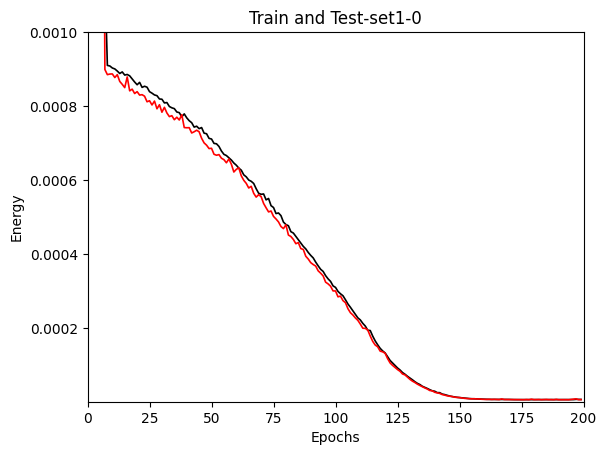

Test Loss: 6.072614198160409e-06
Test Loss: 6.3042015767678095e-06
Test Loss: 6.017114927203693e-06


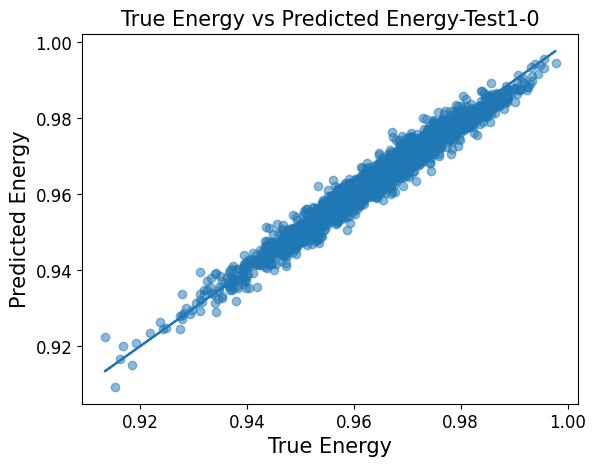

Test Loss: 6.304208085339269e-06


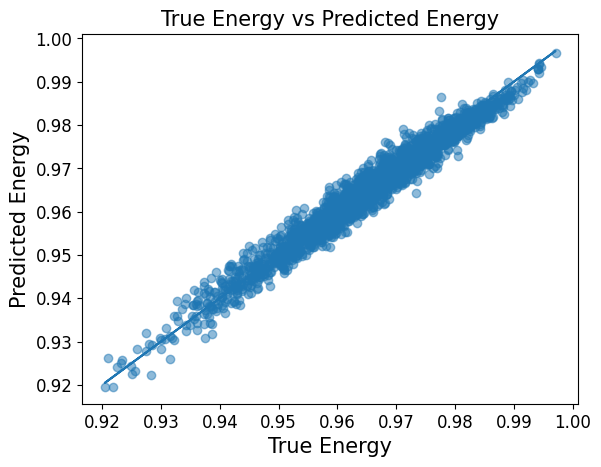

Test Loss: 4.6335406622688424e-06


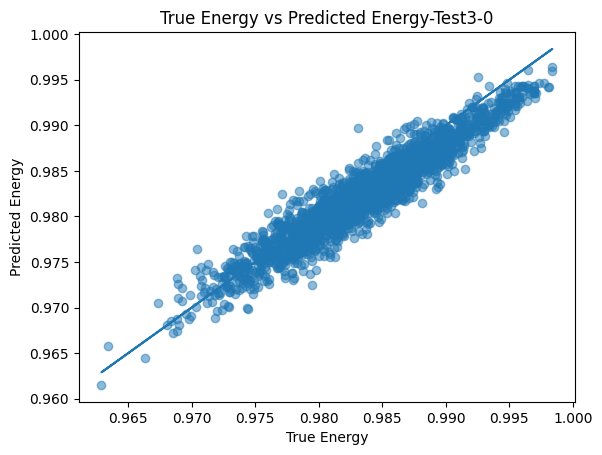

[1.0793648418039083, 0.8890404216945171, 0.6957447845488787, 0.47326195146888494, 0.2469264157116413, 0.08160373696591705, 0.012068831081705866, 0.001148405335698044, 0.000910002116143005, 0.0009084367138711968, 0.0009030163328134222, 0.0009005110914586112, 0.0008947381520556519, 0.0008881126741471235, 0.0008923603527364321, 0.0008838316116452916, 0.0008854736515786499, 0.0008817733669275185, 0.0008734860984986881, 0.0008650782183394767, 0.0008576776799600339, 0.000864165627717739, 0.0008505910736857913, 0.0008536016339348862, 0.0008510360439686337, 0.0008389604317926569, 0.0008348877854587045, 0.0008301027373818215, 0.0008281772697955603, 0.0008192310942831682, 0.0008185229871742195, 0.0008085510307864752, 0.0008095196662907256, 0.0007988580837263726, 0.000795278017903911, 0.0007931210802780697, 0.0007840328380552819, 0.0007822109691915102, 0.0007709281653660582, 0.0007788980665281997, 0.0007682172454224201, 0.0007604430202263757, 0.0007550384325440973, 0.0007431444064422976, 0.000745

In [ ]:
import matplotlib.pyplot as plt
import statistics
m=[]
n=[]
j=[]

for i in range(0,1):
  ##conjunto de datos: test, train y set validación
  train_loader, test_loader = make_loaders(data_l_tr, data_size = 0.075,test_size=0.33,bsize=64)
  eval_loader1, eval_loader2 = make_loaders(data_l_ev, data_size = 0.2,test_size=0.5,bsize=64)
  train_loader_r, test_loader_r = make_loaders(data_r, data_size = 0.075,test_size=0.33,bsize=64)

  #fig, ax = plt.subplots(figsize=(12, 6))
  n_ep = 200
  #model = Graph(1,5).to(device) #si
  #model = GCN(1,5).to(device) #si
  #model = Sage(1,5).to(device)
  #model = CuSage(1,5).to(device)
  #model = Gat(1,5).to(device) #si
  #model = Cheb(1,5,la_k=1).to(device)
  #model = ResGated(1,5).to(device) #si
  #model = GatV2(1,5).to(device)
  #model = Trans2(1,5).to(device) #si
  #model =Simple(1,5).to(device)
  #model = Trans(1,5).to(device) #si
  model = SGC(1,5).to(device) #si
  optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)#,weight_decay=0.0005)
  ep, l_tr, l_te, mse_tr, mse_te = train(model,train_loader,eval_loader1,optimizer,n_epoch=n_ep, opt=option)

# grafica de train y test vs epochs

  plt.plot(ep,l_tr,linewidth=1.2,color='black')
  plt.plot(ep,l_te,linewidth=1.2,color='red')
  #plt.plot(ep,mse_tr,linewidth=0.6,color='green')
  #plt.plot(ep,mse_te,linewidth=0.6,color='orange')
  plt.xlabel('Epochs')
  plt.ylabel('Energy')
  plt.title('Train and Test-set1-' + str(i))
  plt.xlim([0, n_ep/1])
  #plt.ylim([0.0000005, 0.00005])
  plt.ylim([0.0000005, 0.001])
  plt.show()


####
  model.eval()
  eval_loss = 0
  with torch.no_grad():
      for data in eval_loader1:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
  print(f"Test Loss: {eval_loss / len(eval_loader1)}")

  model.eval()
  eval_loss = 0
  with torch.no_grad():
      for data in eval_loader2:
          data = data.to(device)
          if option == 1:
             out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
  print(f"Test Loss: {eval_loss / len(eval_loader2)}")


  #### grafica traint
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in eval_loader1:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())

  print(f"Test Loss: {eval_loss / len(eval_loader1)}")
  plt.scatter(true_energies[:-1:5], predicted_energies[:-1:5], alpha=0.5)
  plt.plot(true_energies[:-1:5],true_energies[:-1:5])
  plt.xlabel('True Energy', fontsize =15)
  plt.ylabel('Predicted Energy', fontsize =15)
  plt.title('True Energy vs Predicted Energy-Test1-' + str(i), fontsize =15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()

#Grafica Test
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in eval_loader2:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())
  print(f"Test Loss: {eval_loss / len(eval_loader2)}")
  plt.scatter(true_energies[:-1:5], predicted_energies[:-1:5], alpha=0.5)
  plt.plot(true_energies[:-1:5],true_energies[:-1:5])
  plt.xlabel('True Energy', fontsize =15)
  plt.ylabel('Predicted Energy', fontsize =15)
  #plt.title('True Energy vs Predicted Energy-Test2-' + str(i), fontsize =15)
  plt.title('True Energy vs Predicted Energy', fontsize =15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()

 #### grafica Val
  loader=train_loader_r
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in loader:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
             out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())

  print(f"Test Loss: {eval_loss / len(loader)}")
  #print(true_energies[:-1:5])
  plt.scatter(true_energies[:-1:5], predicted_energies[:-1:5], alpha=0.5)
  plt.plot(true_energies[:-1:5],true_energies[:-1:5])
  plt.xlabel('True Energy')
  plt.ylabel('Predicted Energy')
  plt.title('True Energy vs Predicted Energy-Test3-' + str(i))
  plt.show()

  j= l_tr + j
  #m=l_te + m
  #n= test_loss + n
mean = statistics.mean(j)
print(l_tr)
print(m)
#print(test_loss)
print(f'promedio de l_tr' +str(mean))



